# LAGRANGE INTERPOLATION

What is Interpolation

Interpolation is a method of finding new data points within the range of a discrete set of known data points (Source Wiki). In other words interpolation is the technique to estimate the value of a mathematical function, for any intermediate value of the independent variable.

How to make the interpolation using lagrange method:

For each $i=0,1,\ldots,n$, there exists a unique polynomial $\ell_{i}$ of degree $\leq n$ such as $\ell_{i}\left(x_{j}\right)=\delta_{ij}$ (one if $i=j$, zero otherwise):

$$ \ell_{i}\left(x\right)= \frac{(x-x_{0})\ldots(x-x_{i-1})(x-x_{i+1})\ldots(x-x_{n})}{(x_{i}-x_{0}) \ldots(x_{i}-x_{i-1})(x_{i}-x_{i+1})\ldots(x_{i}-x_{n})}. $$
The polynomials $\ell_{0},\ell_{1},\ldots,\ell_{n}$ are the Lagrange fundamental polynomials.


The Lagrange polynomial for the points $x_{0,}x_{1},\ldots,x_{n}$ with values $y_{0},y_{1},\ldots,y_{n}$ is

$$ P_{n}\left(x\right)=y_{0}\ell_{0}\left(x\right)+ y_{1}\ell_{1}\left(x\right)+\cdots+y_{n}\ell_{n}\left(x\right) $$

1. Make the lagrange interpolation for set of points (x,y)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate 

In [2]:
def interp_lag(xp,yp,c): #find an interpolation of Lagrange polynomial value in 'c' P(c) from n points (x,y)
    n = len(xp)
    Res = 0
    l = 1 
    for i in range(n):
        xj = np.append(xp[:i],xp[(i+1):]) #den different from 0; xj#xi
        l = ((c-xj).prod())/((xp[i]-xj).prod()) #the lagrange polynomial l
        Res += yp[i] * l
    return Res

In [3]:
#example 1 we make the interpolation for c = 0 using an array for x and y 
x = np.array([1,-1,2])
y = np.array([3,2,-1])
interp_lag(x,y,0)

4.0

In [4]:
#example 2 we make the interpolation for c = 5 using a linspace for x and y 
x = np.linspace(0,20,2)
y = np.linspace(0,15,9)
interp_lag(x,y,5)

0.46875

2. Make the Lagrange interpolation for two function which are $f(x)$ and $g(x)$  and plot them

Let me define the two functions  that I will use :

\begin{equation}
f(x)=3 x+ exp(x)
\label{f}
\end{equation}

\begin{equation}
g(x) = -4 x^3 + 7 x^2 -9 x - 3
\label{g}
\end{equation}

In [5]:
#define the first function f(x)
def f(x):
    return 3*x + np.exp(x)

#define the second function g(x)
def g(x):
    return -4*np.power(x,3) + 7*np.power(x,2) - 9*x - 3

In [6]:
def Inter_lag(xp,yp,X): #lagrange polynomial interpolation for n points (x,func(x));X is the interpolated points
    Y = []         
    for k in range(len(X)):   
        if(X[k] in xp):      #if an interpolated value is found among the given values, we take its corresponding 'y' without interpolation.
            Y.append(yp[np.where(xp==X[k])])
        else:
            res=0                          
            for i in range(len(xp)):#for each value x of xp , the Lagrange polynomials l are first calculated and then multiplied by fx to obtain the interpolation 
                l=1
                for j in range(len(xp)):  
                    if j==i:             #The den has to be different than zero 
                        continue
                    l*=(X[k]-xp[j])/(xp[i]-xp[j]) #the lagrange polynomial
                res += yp[i]*l      
            Y.append(res) #polynomial function 
    return Y 



The graph of the lagrange interpolation for the function g(x)



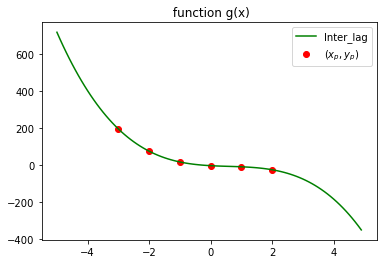

In [7]:
#for fucntion g(x)
xp = np.arange(-3, 3, 1)
yp = g(xp)
X = np.arange(-5 , 5, 0.1) 
Y = Inter_lag(xp,yp,X)
print('\n\nThe graph of the lagrange interpolation for the function g(x)\n')
plt.scatter(xp, g(xp),color="red", label = '$(x_p , y_p)$')
plt.plot(X,Y, 'green', label = 'Inter_lag')
plt.title(' function g(x)')
plt.legend()
plt.show()



The graph of the lagrange interpolation for the function f(x)



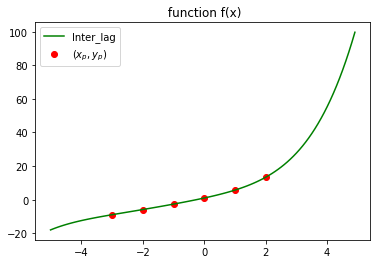

In [8]:
#for fucntion f(x)
xp = np.arange(-3, 3, 1)
yp = f(xp)
X = np.arange(-5, 5, 0.1) 
Y = Inter_lag(xp,yp,X)
print('\n\nThe graph of the lagrange interpolation for the function f(x)\n')
plt.scatter(xp, f(xp),color="red", label = '$(x_p , y_p)$')
plt.plot(X,Y, 'green', label = 'Inter_lag') 
plt.title(' function f(x)')
plt.legend()
plt.show()



the graph of the lagrange interpolation for a random points



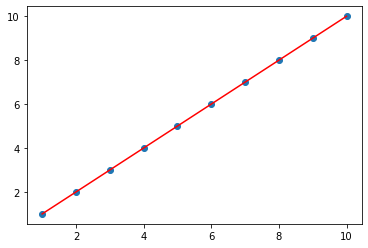

In [9]:
#example 3 for a random number chosen
xp = np.arange(1,11,1)
yp = np.linspace(1,10,10)
X = [1,2,3,4,5,6,7,8,9,10]
Y = Inter_lag(xp, yp, X)
print('\n\nthe graph of the lagrange interpolation for a random points\n')
plt.scatter(xp,yp)
plt.plot(X, Y, 'r')
plt.show()

3. Create the respective primitives of f(x) and g(x). Compute the exact value of the integrals  on the intervals specified below.

You will integrate $f(x)$ over $[0,10]$ and $g(x)$ over $[0,1]$. 

In [10]:
def prim_f(x):
    return 0.5*np.power(x,2) + np.exp(x)

def prim_g(x):
    return -np.power(x,4) + 7/3*np.power(x,3) - 9/2*np.power(x,2) - 3*x

#we make the integration for f(x) with the two boundaries [0,10]
I_f = prim_f(10)-prim_f(0)

#we make the integration for g(x) with the boundaries [0,1]
I_g = prim_g(1)-prim_g(0)
print('The exact value of integral f1 is:', I_f)
print('The exact value of integral f2 is:', I_g)

The exact value of integral f1 is: 22075.465794806718
The exact value of integral f2 is: -6.166666666666666


# Integration using Left Rectangle Method


One method to approximate the integral of a function $f$ between two finite bounds $a$ and $b$ over a constant time step is the following:
$$
\int_a^b f(x) dx \approx \sum_{i=0}^{n-1} h_i \times f(x_i)
$$
It is also called the left rectangle method (LRM), as you will illustrate in the following. It corresponds to quadrature method of order 0, meaning that one approximates the function

Calculation of the integral for the 2 functions with LRM method

In [11]:
def left_rect_meth(x, func):
    n = len(x)
    I = 0
    h = x[1] - x[0] #step of discretization 
    for i in range(0, n-1) :
        I = I + h*func(x[i]) 
    return I


#calculate the integrale of the 2 functions representet by a set of points using left rectangular method
xp_1=np.linspace(0,10,50)
lrm_f = left_rect_meth(xp_1, f)
print("\nthe primitive of f sur [0,10]  by applying left rect meth is: ",lrm_f)


xp_2=np.linspace(0,1,50)
lrm_g = left_rect_meth(xp_2, g)
print("the primitive of g sur [0,1]  by applying left rect meth is:",lrm_g)


print("\n\n")


the primitive of f sur [0,10]  by applying left rect meth is:  20001.300507708464
the primitive of g sur [0,1]  by applying left rect meth is: -6.105372761349439





In [12]:
def left_rect_meth_lag(x, y):    #y represent set of points
    n=len(x)
    I=0
    h=x[1]-x[0]
    for i in range(0,n-1):
        I=I+h*y[i]
    return I

#calculate the integrale of the 2 functions representet by a set of points interpolated by lagrange using left rectangular method


xp_1=np.linspace(0,10,50)
yp_1=f(xp_1)
X1 = np.linspace(0,10,100) 
Y1 = Inter_lag(xp_1,yp_1,X1)
lrm_f_lag = left_rect_meth_lag(X1, Y1)
print("\nthe primitive of f sur [0,10] using lagrange interpolation by applying left rect meth is:",lrm_f_lag)


xp_2 = np.linspace(0,1,50)
yp_2 = g(xp_2)
X2 = np.linspace(0,1,100)
Y2 = Inter_lag(xp_2, yp_2, X2)
lrm_g_lag = left_rect_meth_lag(X2, Y2)
print("\nthe primitive of g sur [0,1] using lagrange interpolation by applying left rect meth is:",lrm_g_lag)


the primitive of f sur [0,10] using lagrange interpolation by applying left rect meth is: [21080.27620067]

the primitive of g sur [0,1] using lagrange interpolation by applying left rect meth is: [-6.13633515]


Equation of convergence with $alpha$ order

\begin{equation}
\epsilon_f(h) = C_f \times h ^ \alpha 
\end{equation}

\begin{equation}
h = (b-a)/(num-1) 
\end{equation}


Compute the error of integration $\epsilon_f$ as a function of the discretization step $h$, and plot these error on a log-log scale graph 

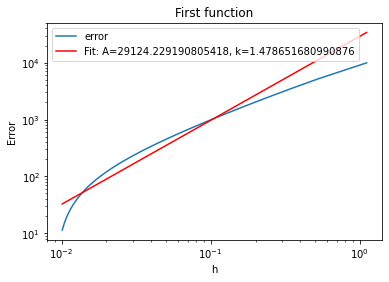

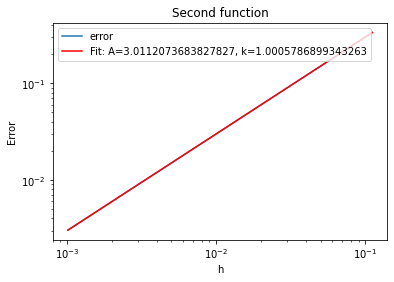

In [13]:
def plot_err(a, b, func, Itrue, int_meth=left_rect_meth, fit=True) :
    num=np.arange(10,1000,10) # number of rectangle
    h=(b-a)/(num-1) # step
    Irect=[]
    for n in num :
        x=np.linspace(a, b, n)
        Irect.append(int_meth(x, func))
    err = np.abs(np.array(Irect)- Itrue)
    plt.loglog(h, err, label="error")
    plt.xlabel("h")
    plt.ylabel("Error")
    if fit  :   # fit a polynomial model of first order; assuming that err = A h**k, log(err)= k*log(h)+log(A)
        k, logA=np.polyfit(np.log(h), np.log(err),1)
        A=np.exp(logA)
        plt.loglog(h, A*h**k, color="red",label="Fit: A={}, k={}".format(A,k)) 
    plt.legend()

  
plot_err(0, 10, f, I_f)
plt.title("First function")
plt.show()


plot_err(0, 1, g, I_g)
plt.title("Second function")
plt.show()



Use scipy for make the Integration of the two functions

In [15]:
import scipy.integrate as integrate

f_sci,error = integrate.quad(f,0,10)
g_sci,error = integrate.quad(g,0,1)
print('\nFirst function :', f_sci)
print('first fct without lagrange:',lrm_f)
print('first fct with lagrange:',lrm_f_lag)
print('\nSecond function :', g_sci)
print('second fct without lagrange:',lrm_g)
print('second fct with lagrange:',lrm_g_lag)


First function : 22175.465794806725
first fct without lagrange: 20001.300507708464
first fct with lagrange: [21080.27620067]

Second function : -6.166666666666666
second fct without lagrange: -6.105372761349439
second fct with lagrange: [-6.13633515]


In [16]:
print("\nBy using lagrange we can obtain more points representatif of functions.\nIf we increase the number of points interpolated by lagrange we obtain a more precis value of integral with using left rect method")

print('\n\n\n')


By using lagrange we can obtain more points representatif of functions.
If we increase the number of points interpolated by lagrange we obtain a more precis value of integral with using left rect method




